In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
Positive = pd.DataFrame()
Same = pd.DataFrame()
Decrease = pd.DataFrame()

In [3]:
def getStock(ticker):
    df = data.DataReader(ticker, 'iex', '2015-01-01', '2018-12-17')
    df.drop(['open', 'high', 'low','volume'], axis=1,inplace=True)
    return df

In [4]:
def pct(ticker):
    df = ticker.pct_change()
    return df

In [5]:
def stockSort(stockName):
    global Positive, Same, Decrease
    for index, row in stockName.iterrows():
        if stockName.loc[index]['pctChange'].item() > 0.015:
            Positive = Positive.append([stockName.loc[index]],ignore_index=False)
        elif stockName.loc[index]['pctChange'].item() < 0.015 and stockName.loc[index]['pctChange'].item() > -0.015:
            Same = Same.append([stockName.loc[index]],ignore_index=False)
        elif stockName.loc[index]['pctChange'].item() < -0.015:
            Decrease = Decrease.append([stockName.loc[index]],ignore_index=False)
        else:
            print("Start value not used")

In [6]:
Stock = getStock('TSLA')

In [7]:
Stock.set_index(pd.DatetimeIndex(Stock.index), inplace=True)#sets the stock date as index

In [8]:
Stock = Stock.resample('D').interpolate()#fills in for missing days with 

In [9]:
Stock['pctChange'] = pct(Stock)

In [10]:
stockSort(Stock)

Start value not used


In [11]:
for i in range(len(Positive)):
    Positive['StockChange'] = "positive"

In [12]:
for i in range(len(Decrease)):
    Decrease['StockChange']='decrease'

In [13]:
for i in range(len(Same)):
    Same['StockChange']='neutral'

In [14]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2015-01-02 to 2018-12-11
Freq: D
Data columns (total 2 columns):
close        1440 non-null float64
pctChange    1439 non-null float64
dtypes: float64(2)
memory usage: 73.8 KB


In [15]:
finalStock = pd.concat([Positive, Same, Decrease])

In [16]:
finalStock = finalStock.sort_index()

In [17]:
finalStock.to_csv('finalStockTSLA15.csv',encoding='utf-8')

In [18]:
Positive.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2015-01-21 to 2018-11-30
Data columns (total 3 columns):
close          224 non-null float64
pctChange      224 non-null float64
StockChange    224 non-null object
dtypes: float64(2), object(1)
memory usage: 7.0+ KB


In [19]:
Same.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1019 entries, 2015-01-03 to 2018-12-11
Data columns (total 3 columns):
close          1019 non-null float64
pctChange      1019 non-null float64
StockChange    1019 non-null object
dtypes: float64(2), object(1)
memory usage: 31.8+ KB


In [20]:
Decrease.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2015-01-09 to 2018-11-29
Data columns (total 3 columns):
close          196 non-null float64
pctChange      196 non-null float64
StockChange    196 non-null object
dtypes: float64(2), object(1)
memory usage: 6.1+ KB


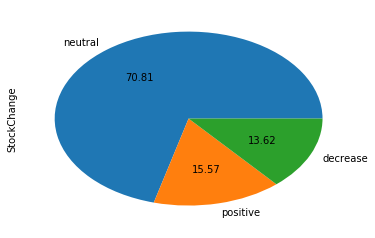

In [21]:
finalStock.StockChange.value_counts().plot.pie(autopct='%.2f')

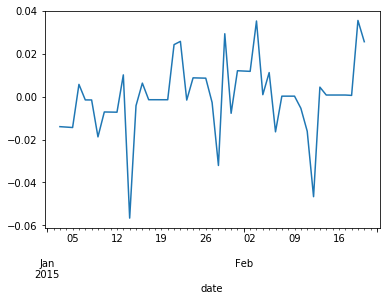

In [22]:
Stock.head(50).pctChange.plot(stacked=False)

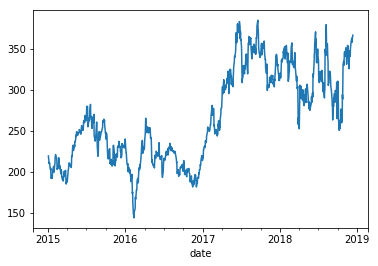

In [23]:
Stock.close.plot.line()

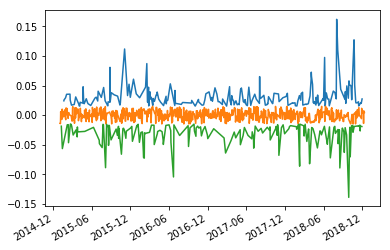

In [24]:
ax = Positive.pctChange.plot.line()
Same.pctChange.plot.line(ax=ax)
Decrease.pctChange.plot.line(ax=ax)